# import library

In [763]:
import mlxtend

In [764]:
# importing library
import pandas as pd
import numpy as np
import glob
from openpyxl import Workbook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
  

# load dataset

In [765]:
# read all file in PWD
listing = glob.glob("*.csv")
print(len(listing))
print(listing)

1
['IBM HR Data new 1.csv']


In [766]:
# read the dataset
df = pd.read_csv('IBM HR Data new 1.csv')
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_16808\2444078667.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('IBM HR Data new 1.csv')


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,7,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,8,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,9,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [767]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23425 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  float64
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  float64
 9   EmployeeNumber            23435 non-null  object 
 10  Application ID            23431 non-null  object 
 11  EnvironmentSatisfaction   23427 non-null  float64
 12  Gender                    23426 non-null  object 
 13  HourlyRate                23427 non-null  float64
 14  JobInv

In [768]:
df.columns
# ['Age'
# , 'Attrition'
# , 'BusinessTravel'
# , 'DailyRate'
# , 'Department'
# ,'DistanceFromHome'
# , 'Education'
# , 'EducationField'
# , 'EmployeeCount'
# ,'EmployeeNumber'
# , 'Application ID'
# , 'EnvironmentSatisfaction'
# , 'Gender'
# ,'HourlyRate'
# , 'JobInvolvement'
# , 'JobLevel'
# , 'JobRole'
# ,'JobSatisfaction'
# , 'MaritalStatus'
# , 'MonthlyIncome'
# , 'MonthlyRate'
# ,'NumCompaniesWorked'
# , 'Over18'
# , 'OverTime'
# , 'PercentSalaryHike'
# ,'PerformanceRating'
# , 'RelationshipSatisfaction'
# , 'StandardHours'
# ,'StockOptionLevel'
# , 'TotalWorkingYears'
# , 'TrainingTimesLastYear'
# ,'WorkLifeBalance'
# , 'YearsAtCompany'
# , 'YearsInCurrentRole'
# ,'YearsSinceLastPromotion'
# , 'YearsWithCurrManager'
# , 'Employee Source']

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'Application ID', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

# data cleaning

## blank

In [769]:
df.dropna(inplace=True)

In [770]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23203 entries, 0 to 23432
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23203 non-null  float64
 1   Attrition                 23203 non-null  object 
 2   BusinessTravel            23203 non-null  object 
 3   DailyRate                 23203 non-null  float64
 4   Department                23203 non-null  object 
 5   DistanceFromHome          23203 non-null  float64
 6   Education                 23203 non-null  float64
 7   EducationField            23203 non-null  object 
 8   EmployeeCount             23203 non-null  float64
 9   EmployeeNumber            23203 non-null  object 
 10  Application ID            23203 non-null  object 
 11  EnvironmentSatisfaction   23203 non-null  float64
 12  Gender                    23203 non-null  object 
 13  HourlyRate                23203 non-null  float64
 14  JobInv

## duplicate

In [771]:
df.drop_duplicates(inplace=True)

In [772]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23189 entries, 0 to 23432
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23189 non-null  float64
 1   Attrition                 23189 non-null  object 
 2   BusinessTravel            23189 non-null  object 
 3   DailyRate                 23189 non-null  float64
 4   Department                23189 non-null  object 
 5   DistanceFromHome          23189 non-null  float64
 6   Education                 23189 non-null  float64
 7   EducationField            23189 non-null  object 
 8   EmployeeCount             23189 non-null  float64
 9   EmployeeNumber            23189 non-null  object 
 10  Application ID            23189 non-null  object 
 11  EnvironmentSatisfaction   23189 non-null  float64
 12  Gender                    23189 non-null  object 
 13  HourlyRate                23189 non-null  float64
 14  JobInv

# column grouping

In [773]:
df[['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'Application ID', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole']].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23189 entries, 0 to 23432
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      23189 non-null  float64
 1   Attrition                23189 non-null  object 
 2   BusinessTravel           23189 non-null  object 
 3   DailyRate                23189 non-null  float64
 4   Department               23189 non-null  object 
 5   DistanceFromHome         23189 non-null  float64
 6   Education                23189 non-null  float64
 7   EducationField           23189 non-null  object 
 8   EmployeeCount            23189 non-null  float64
 9   EmployeeNumber           23189 non-null  object 
 10  Application ID           23189 non-null  object 
 11  EnvironmentSatisfaction  23189 non-null  float64
 12  Gender                   23189 non-null  object 
 13  HourlyRate               23189 non-null  float64
 14  JobInvolvement        

In [774]:
df[['JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23189 entries, 0 to 23432
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   JobSatisfaction           23189 non-null  float64
 1   MaritalStatus             23189 non-null  object 
 2   MonthlyIncome             23189 non-null  float64
 3   MonthlyRate               23189 non-null  float64
 4   NumCompaniesWorked        23189 non-null  float64
 5   Over18                    23189 non-null  object 
 6   OverTime                  23189 non-null  object 
 7   PercentSalaryHike         23189 non-null  float64
 8   PerformanceRating         23189 non-null  float64
 9   RelationshipSatisfaction  23189 non-null  float64
 10  StandardHours             23189 non-null  float64
 11  StockOptionLevel          23189 non-null  float64
 12  TotalWorkingYears         23189 non-null  float64
 13  TrainingTimesLastYear     23189 non-null  float64
 14  WorkLi

In [775]:
num_col = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate'
, 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike'
, 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear'
, 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

categ_col = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'EmployeeNumber'
, 'Application ID', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Employee Source']

# dataset manipulation

## categorical to binary / ordinal

In [776]:
df[categ_col].head()

,Attrition,BusinessTravel,Department,EducationField,EmployeeNumber,Application ID,Gender,JobRole,MaritalStatus,Over18,OverTime,Employee Source
0,Voluntary Resignation,Travel_Rarely,Sales,Life Sciences,1,123456,Female,Sales Executive,Single,Y,Yes,Referral
1,Voluntary Resignation,Travel_Rarely,Sales,Life Sciences,1,123458,Female,Sales Executive,Single,Y,Yes,Referral
2,Voluntary Resignation,Travel_Rarely,Sales,Life Sciences,7,123462,Female,Sales Executive,Single,Y,Yes,Referral
3,Voluntary Resignation,Travel_Rarely,Sales,Life Sciences,8,123463,Female,Sales Executive,Single,Y,Yes,Referral
4,Voluntary Resignation,Travel_Rarely,Sales,Life Sciences,9,123464,Female,Sales Executive,Single,Y,Yes,Referral


In [777]:
df['Attrition'].unique()

array(['Voluntary Resignation', 'Current employee'], dtype=object)

In [778]:
attrition = df['Attrition'].to_list()

for i,el in enumerate(attrition):
    if attrition[i] == 'Voluntary Resignation':
        attrition[i] = 1
    else:
        attrition[i] = 0
        
df['Resign'] = attrition

In [779]:
df['Resign'].unique()

array([1, 0], dtype=int64)

In [780]:
bus_trav = df['BusinessTravel'].to_list()

for i,el in enumerate(bus_trav):
    if bus_trav[i] == 'Travel_Rarely':
        bus_trav[i] = 1
    elif bus_trav[i] == 'Travel_Frequently':
        bus_trav[i] = 2
    else:
        bus_trav[i] = 0
        
df['BusinessTravel'] = bus_trav

In [781]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [782]:
sex = df['Gender'].to_list()

for i,el in enumerate(sex):
    if sex[i] == 'Male':
        sex[i] = 1
    else:
        sex[i] = 0
        
df['sex'] = sex

In [783]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [784]:
ot = df['OverTime'].to_list()

for i,el in enumerate(ot):
    if ot[i] == 'Yes':
        ot[i] = 1
    else:
        ot[i] = 0
        
df['OverTime'] = ot

## one hot encoding

In [785]:
polytomous_categorical_column = ['Department', 'EducationField', 'JobRole', 'Employee Source']

In [786]:
for i in polytomous_categorical_column:
  dum_df = pd.get_dummies(df, columns=[i], prefix=[i])
  df = df.merge(dum_df)

In [787]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'Application ID', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source',
       'Resign', 'sex', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_

# correlation

In [788]:
corr_col = ['', '', '', '', '', '', '', '', '', '', '', '', '']

In [789]:
# corr_col = []
corr_col[1] = ['Resign', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate']
corr_col[2] = ['Resign', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike']
corr_col[3] = ['Resign', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear']
corr_col[4] = ['Resign', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
corr_col[5] = ['Resign', 'BusinessTravel', 'sex', 'OverTime', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales']
corr_col[6] = ['Resign', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical']
corr_col[7] = ['Resign', 'EducationField_Other', 'EducationField_Technical Degree', 'EducationField_Test', 'JobRole_Healthcare Representative']
corr_col[8] = ['Resign', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director']
corr_col[9] = ['Resign', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative']
corr_col[10] = ['Resign', 'Employee Source_Adzuna', 'Employee Source_Company Website', 'Employee Source_GlassDoor', 'Employee Source_Indeed']
corr_col[11] = ['Resign', 'Employee Source_Jora', 'Employee Source_LinkedIn', 'Employee Source_Recruit.net', 'Employee Source_Referral']
corr_col[12] = ['Resign', 'Employee Source_Seek', 'Employee Source_Test']

In [790]:
len(corr_col)

13

C:\Users\User\AppData\Local\Temp\ipykernel_16808\455574284.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[corr_col[i]].corr(), dtype=np.bool))


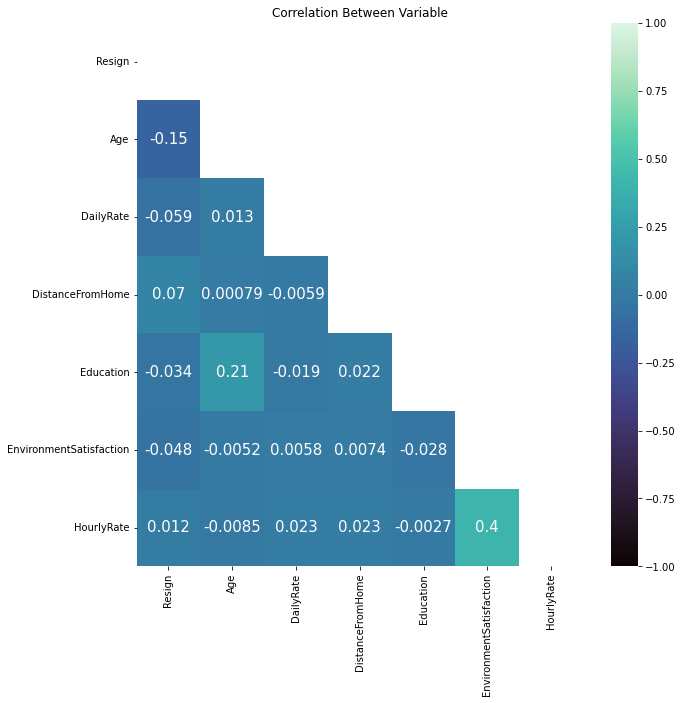

C:\Users\User\AppData\Local\Temp\ipykernel_16808\455574284.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[corr_col[i]].corr(), dtype=np.bool))


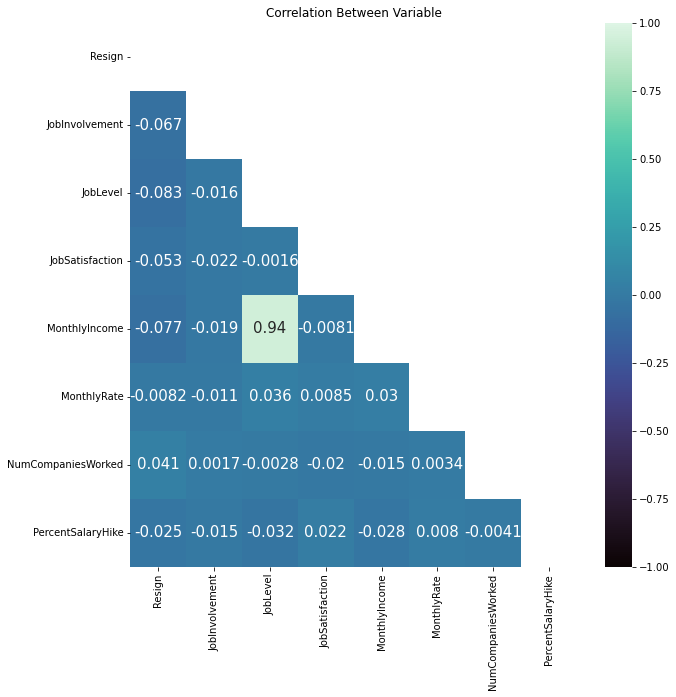

C:\Users\User\AppData\Local\Temp\ipykernel_16808\455574284.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[corr_col[i]].corr(), dtype=np.bool))


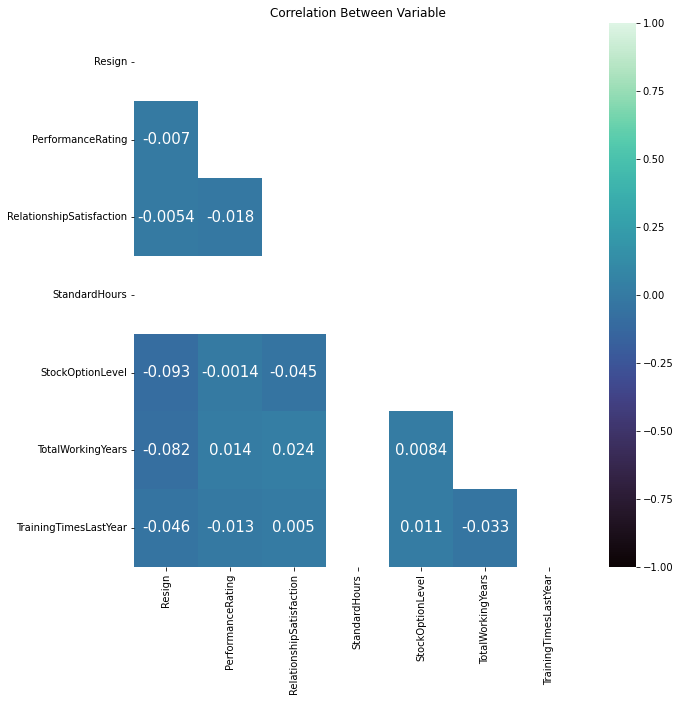

C:\Users\User\AppData\Local\Temp\ipykernel_16808\455574284.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[corr_col[i]].corr(), dtype=np.bool))


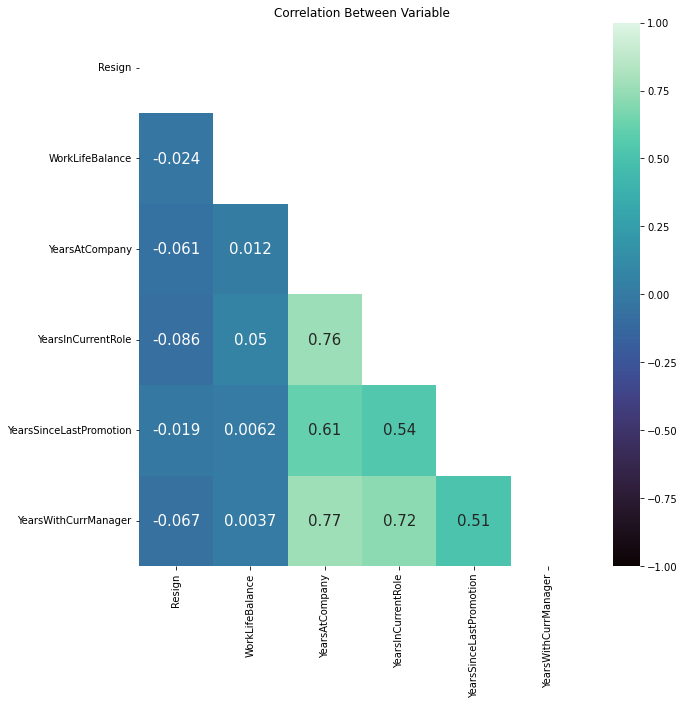

C:\Users\User\AppData\Local\Temp\ipykernel_16808\455574284.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[corr_col[i]].corr(), dtype=np.bool))


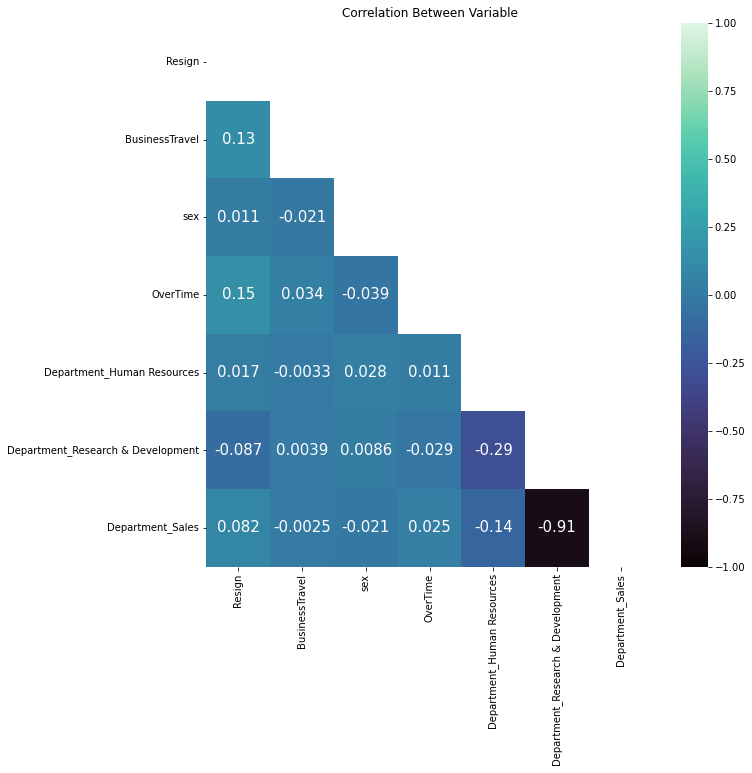

C:\Users\User\AppData\Local\Temp\ipykernel_16808\455574284.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[corr_col[i]].corr(), dtype=np.bool))


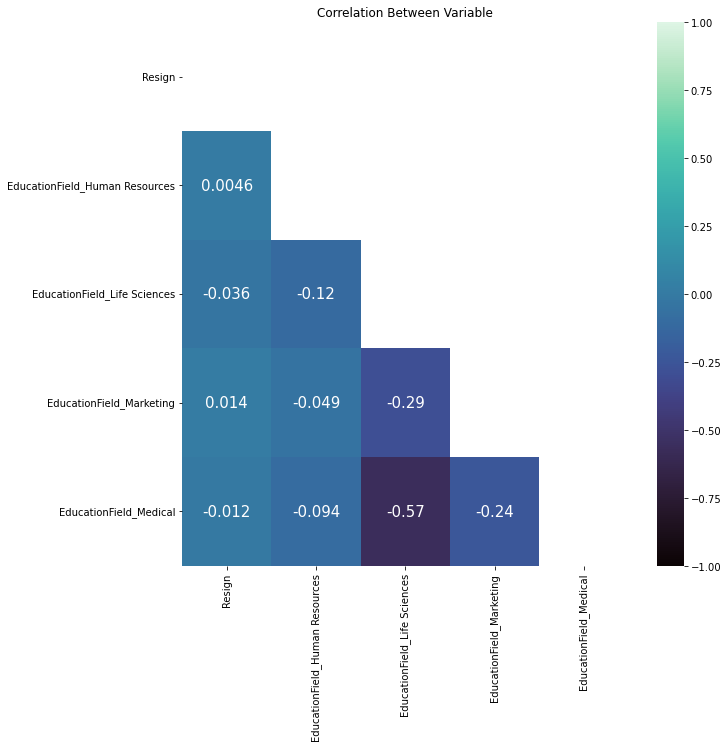

C:\Users\User\AppData\Local\Temp\ipykernel_16808\455574284.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[corr_col[i]].corr(), dtype=np.bool))


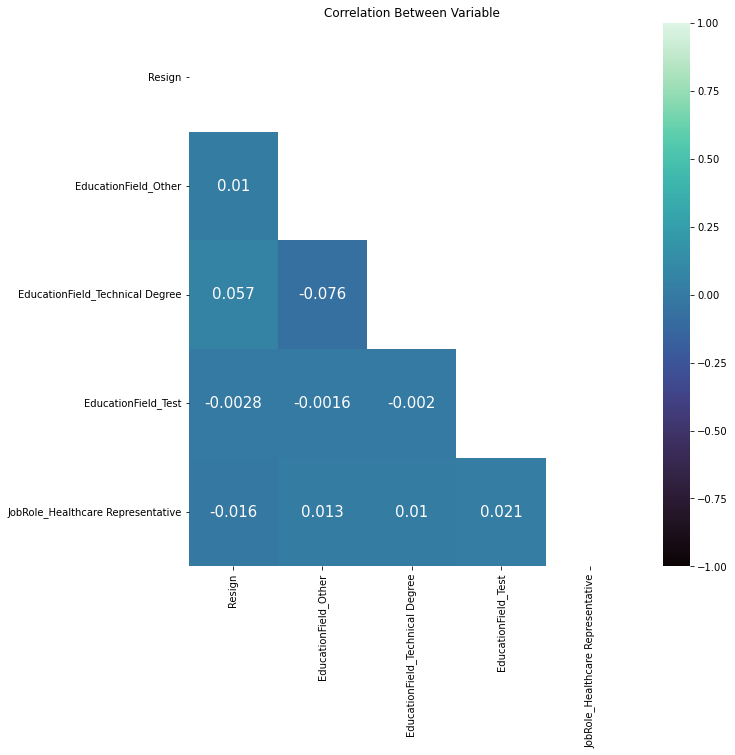

C:\Users\User\AppData\Local\Temp\ipykernel_16808\455574284.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[corr_col[i]].corr(), dtype=np.bool))


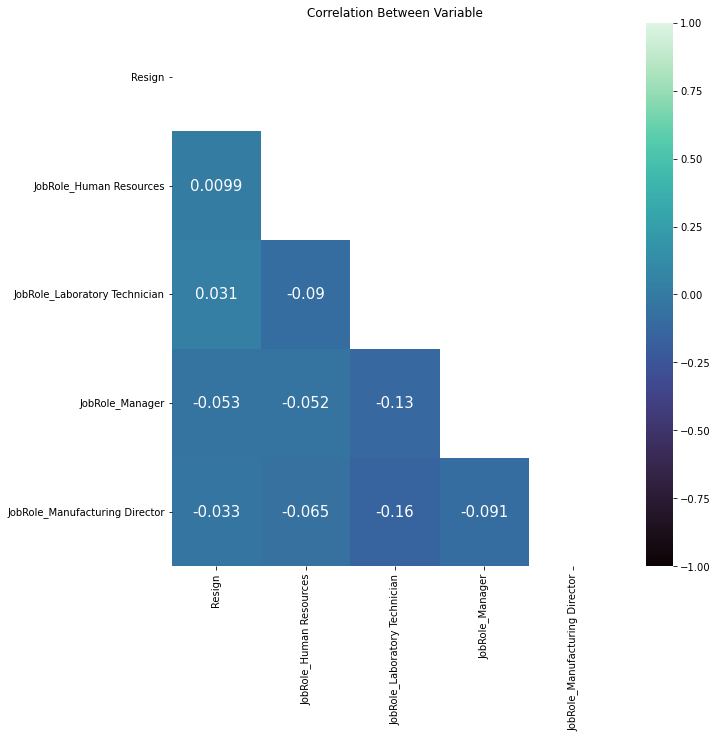

C:\Users\User\AppData\Local\Temp\ipykernel_16808\455574284.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[corr_col[i]].corr(), dtype=np.bool))


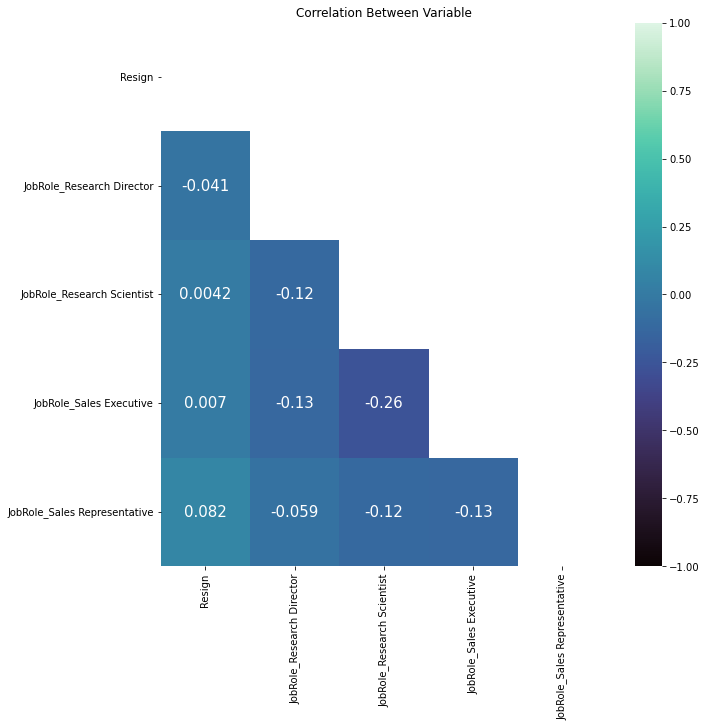

C:\Users\User\AppData\Local\Temp\ipykernel_16808\455574284.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[corr_col[i]].corr(), dtype=np.bool))


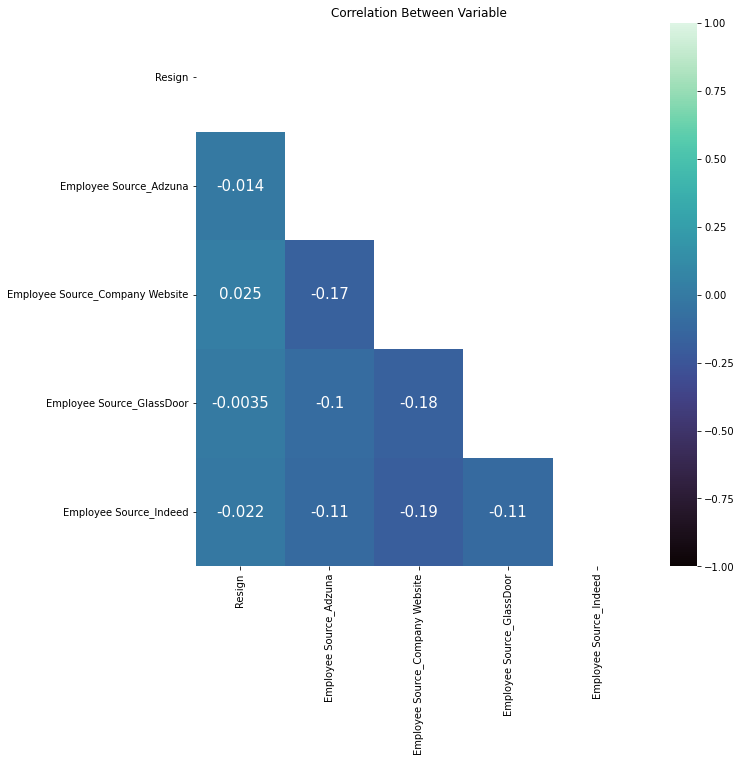

C:\Users\User\AppData\Local\Temp\ipykernel_16808\455574284.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[corr_col[i]].corr(), dtype=np.bool))


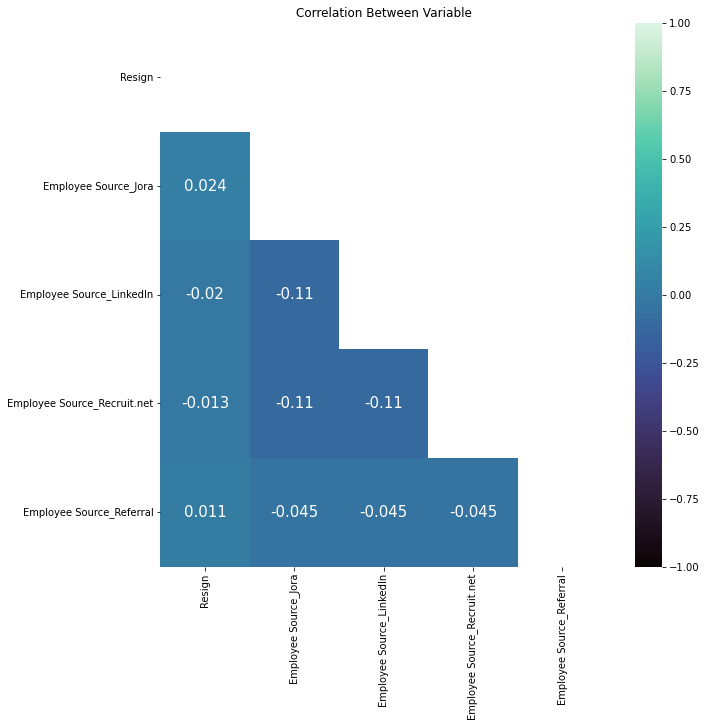

C:\Users\User\AppData\Local\Temp\ipykernel_16808\455574284.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[corr_col[i]].corr(), dtype=np.bool))


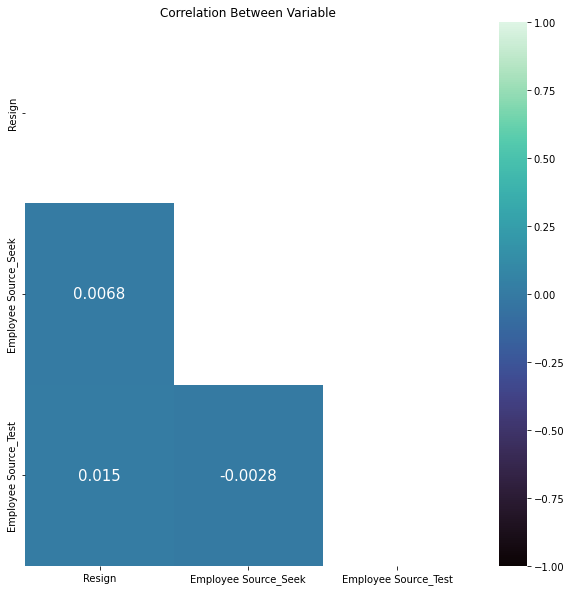

In [791]:
for i in range(1,13):

    fig = plt.figure(figsize=(10,10))

    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Correlation Between Variable')

    mask = np.triu(np.ones_like(
        df[corr_col[i]].corr(), dtype=np.bool))
    sns.heatmap(df[corr_col[i]].corr(),vmin=-1,
                vmax=1,cmap='mako',annot=True,mask=mask,
                annot_kws={"fontsize":15})

    plt.show()

In [792]:
high_corr = ['Resign', 'Age', 'BusinessTravel', 'OverTime', 'DailyRate', 'DistanceFromHome', 'JobInvolvement', 'JobLevel', 'JobSatisfaction'
, 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'
, 'Department_Research & Development', 'Department_Sales', 'EducationField_Technical Degree', 'JobRole_Manager'
, 'JobRole_Sales Representative']

C:\Users\User\AppData\Local\Temp\ipykernel_16808\3636513769.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[high_corr].corr(), dtype=np.bool))


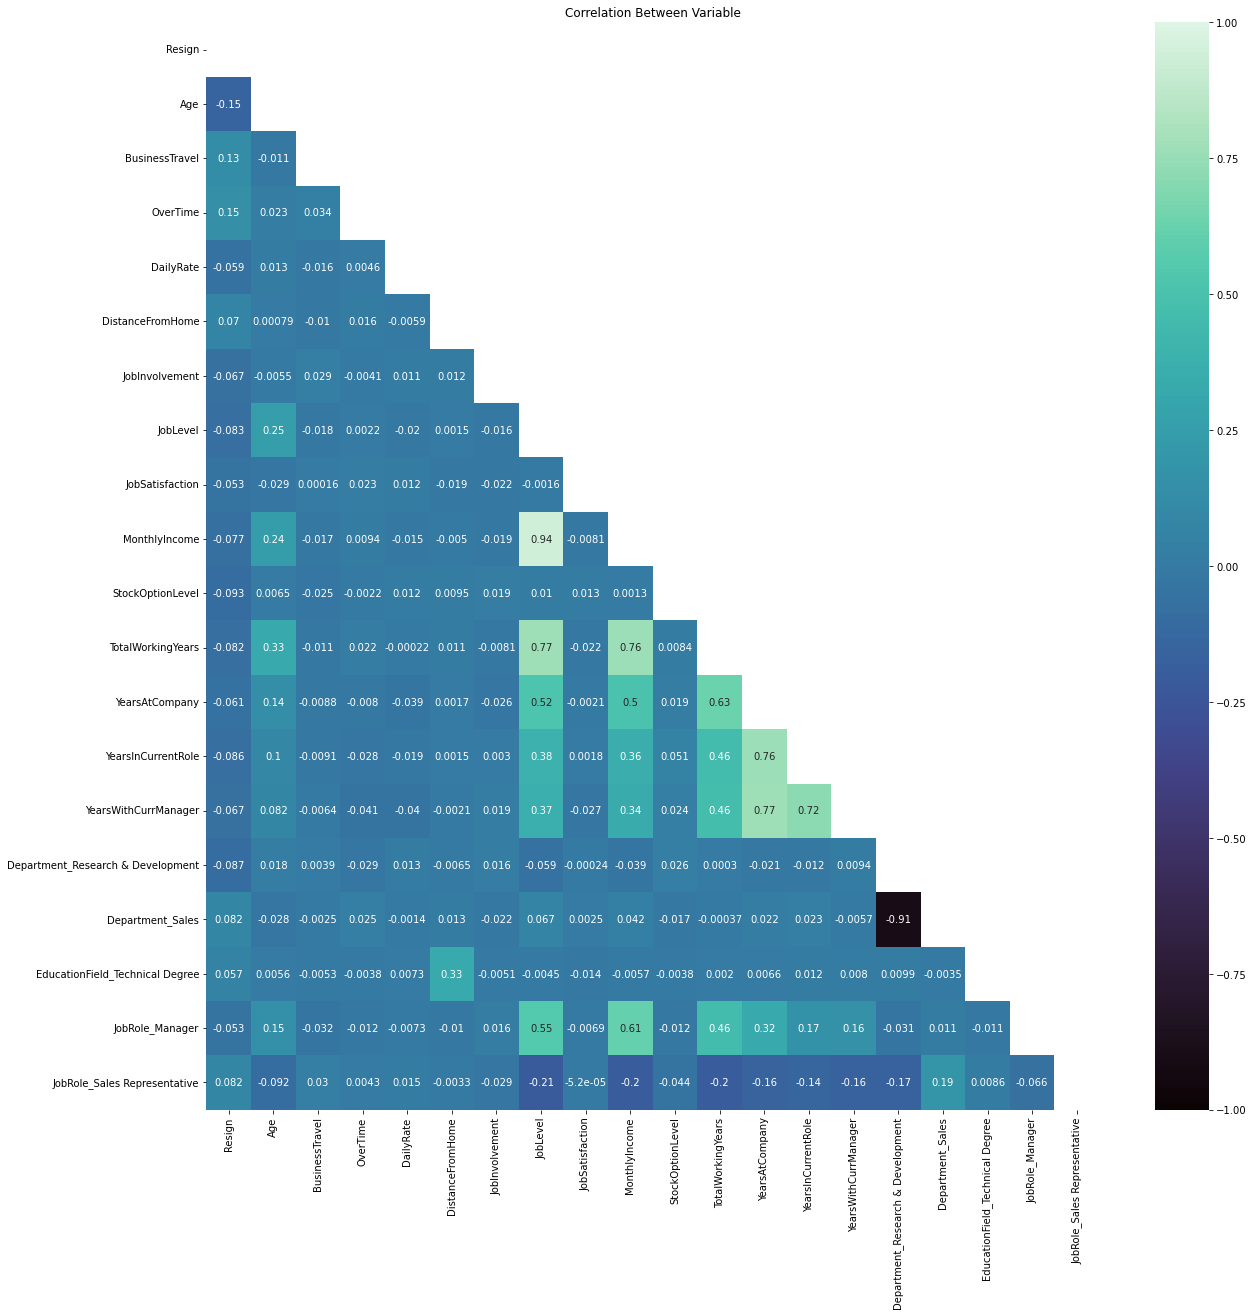

In [793]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(
    df[high_corr].corr(), dtype=np.bool))
sns.heatmap(df[high_corr].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

In [794]:
df_export = df[high_corr]

In [795]:
df_export.head()

,Resign,Age,BusinessTravel,OverTime,DailyRate,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Technical Degree,JobRole_Manager,JobRole_Sales Representative
0,1,41.0,1,1,1102.0,1.0,3.0,2.0,4.0,5993.0,0.0,8.0,6.0,4.0,5.0,0,1,0,0,0
1,1,41.0,1,1,1102.0,1.0,3.0,2.0,4.0,5993.0,0.0,8.0,6.0,4.0,5.0,0,1,0,0,0
2,1,41.0,1,1,1102.0,1.0,3.0,2.0,4.0,5993.0,0.0,8.0,6.0,4.0,5.0,0,1,0,0,0
3,1,41.0,1,1,1102.0,1.0,3.0,2.0,4.0,5993.0,0.0,8.0,6.0,4.0,5.0,0,1,0,0,0
4,1,41.0,1,1,1102.0,1.0,3.0,2.0,4.0,5993.0,0.0,8.0,6.0,4.0,5.0,0,1,0,0,0


In [796]:
df_export.to_excel('modeling.xlsx')

In [797]:
new_high_corr = ['Resign', 'BusinessTravel', 'OverTime', 'JobInvolvement', 'JobLevel'
, 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'
]

C:\Users\User\AppData\Local\Temp\ipykernel_16808\604274398.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[new_high_corr].corr(), dtype=np.bool))


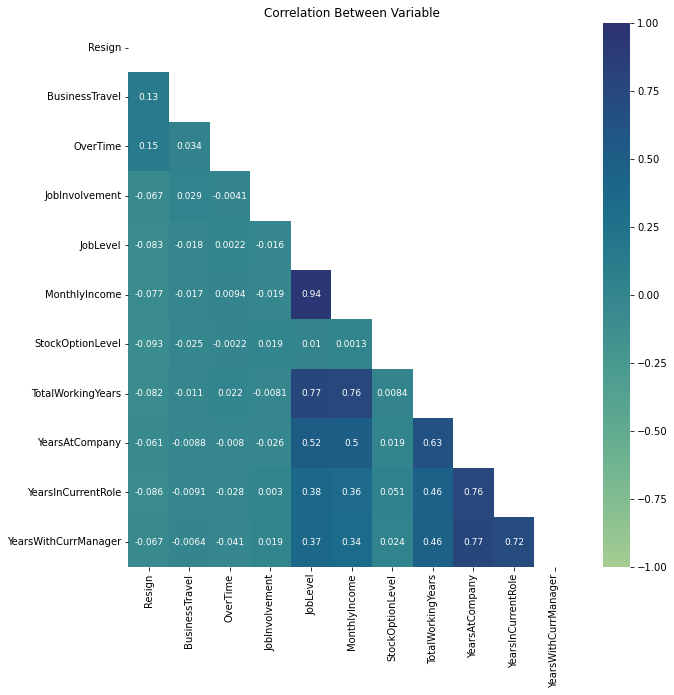

In [798]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(
    df[new_high_corr].corr(), dtype=np.bool))
sns.heatmap(df[new_high_corr].corr(),vmin=-1,
            vmax=1,cmap='crest',annot=True,mask=mask,
            annot_kws={"fontsize":9})

plt.show()

In [799]:
df[new_high_corr].corr()['Resign']

Resign                  1.000000
BusinessTravel          0.128214
OverTime                0.146063
JobInvolvement         -0.067001
JobLevel               -0.082576
MonthlyIncome          -0.076864
StockOptionLevel       -0.093050
TotalWorkingYears      -0.082216
YearsAtCompany         -0.061215
YearsInCurrentRole     -0.085508
YearsWithCurrManager   -0.066695
Name: Resign, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_16808\2557970868.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[cor_col[i]].corr(), dtype=np.bool))


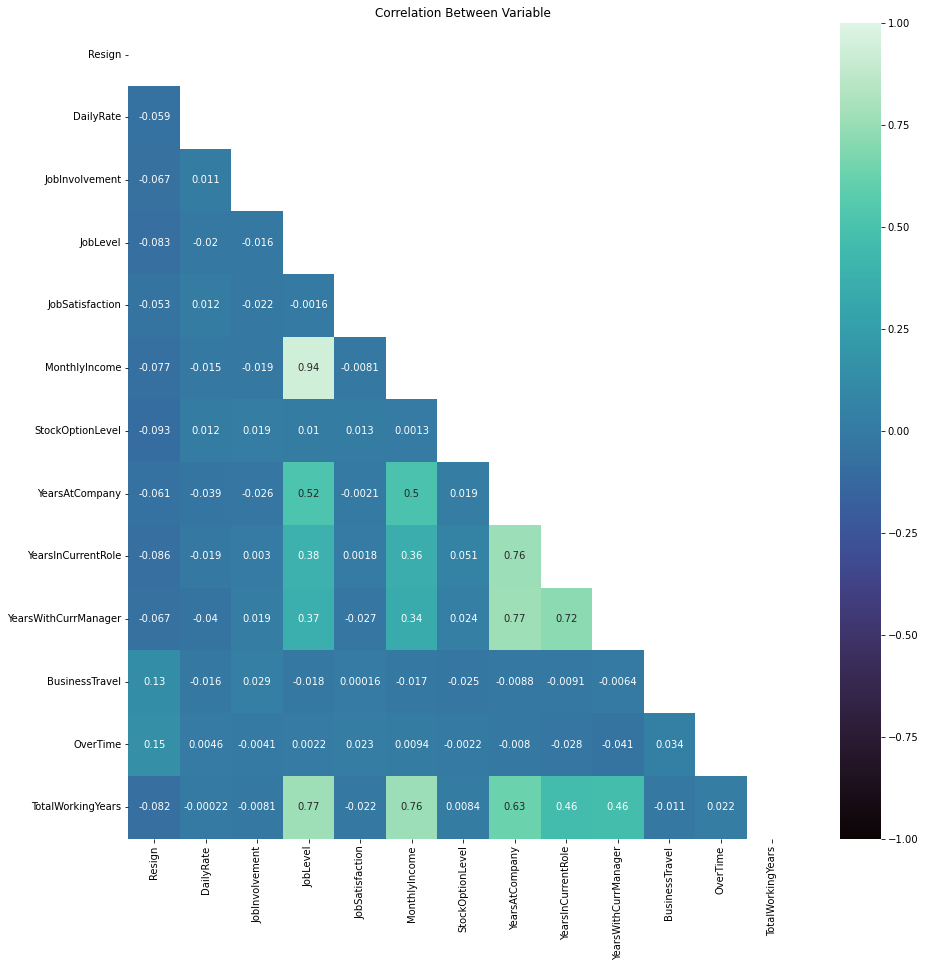

In [800]:
cor_col = ['', '', '', '', '', '', '']
cor_col[1] = ['Resign', 'DailyRate'
, 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome'
, 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'
, 'BusinessTravel', 'OverTime', 'TotalWorkingYears']

for i in range(1,2):

    fig = plt.figure(figsize=(15,15))

    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Correlation Between Variable')

    mask = np.triu(np.ones_like(
        df[cor_col[i]].corr(), dtype=np.bool))
    sns.heatmap(df[cor_col[i]].corr(),vmin=-1,
                vmax=1,cmap='mako',annot=True,mask=mask,
                annot_kws={"fontsize":10})

    plt.show()

# regresi

In [801]:
high_correl = ['Age', 'BusinessTravel', 'OverTime', 'DailyRate', 'DistanceFromHome', 'JobInvolvement', 'JobLevel', 'JobSatisfaction'
, 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'
, 'Department_Research & Development', 'Department_Sales', 'EducationField_Technical Degree', 'JobRole_Manager'
, 'JobRole_Sales Representative']

y = df['Resign']
x = df[high_correl]

import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.386349
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Resign   No. Observations:                23189
Model:                          Logit   Df Residuals:                    23172
Method:                           MLE   Df Model:                           16
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.1143
Time:                        20:08:08   Log-Likelihood:                -8959.0
converged:                       True   LL-Null:                       -10115.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0425      0.002    -20

In [802]:
model = LogisticRegression(class_weight='balanced')
model.fit(x, y)

#display regression coefficients and R-squared value of model
print(model.intercept_, model.coef_, model.score(x, y))

[0.25232463] [[-2.88546111e-02  8.02317179e-01  6.91162004e-01 -1.05484499e-04
   3.74599574e-02 -4.40453084e-03 -1.06126896e-01 -8.58865061e-02
  -3.44496036e-01  4.21500771e-02 -4.13772616e-02 -4.06970271e-02
  -1.65251229e-01  3.83278187e-01  1.11379907e-01 -9.75386996e-02
   1.64606281e-01]] 0.6727327612229936


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [803]:
high_correl = ['Age', 'BusinessTravel', 'OverTime', 'DailyRate', 'DistanceFromHome', 'JobInvolvement', 'JobLevel', 'JobSatisfaction'
, 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole'
, 'Department_Research & Development', 'Department_Sales', 'EducationField_Technical Degree', 'JobRole_Manager'
, 'JobRole_Sales Representative']

y = df['Resign']
x = df[high_correl]

import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.386374
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Resign   No. Observations:                23189
Model:                          Logit   Df Residuals:                    23173
Method:                           MLE   Df Model:                           15
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.1142
Time:                        20:08:08   Log-Likelihood:                -8959.6
converged:                       True   LL-Null:                       -10115.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0425      0.002    -20

In [804]:
model = LogisticRegression(class_weight='balanced')
model.fit(x, y)

#display regression coefficients and R-squared value of model
print(model.intercept_, model.coef_, model.score(x, y))

[0.35605817] [[-3.29387117e-02  9.16183376e-01  8.93437137e-01 -1.80875443e-04
   2.78185493e-02 -1.25891987e-01 -5.47391534e-02 -2.36044147e-02
  -2.29192105e-01  2.25316110e-02 -6.32295965e-02 -1.25157769e-01
   4.30597223e-01  1.64276824e-01 -1.28926429e-01  2.07652404e-01]] 0.6596662210530855


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [805]:
high_correl = ['Age', 'BusinessTravel', 'OverTime', 'DailyRate', 'DistanceFromHome', 'JobInvolvement', 'JobLevel', 'JobSatisfaction'
, 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole'
, 'Department_Sales', 'EducationField_Technical Degree', 'JobRole_Manager'
, 'JobRole_Sales Representative']

y = df['Resign']
x = df[high_correl]

import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.386403
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Resign   No. Observations:                23189
Model:                          Logit   Df Residuals:                    23174
Method:                           MLE   Df Model:                           14
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.1142
Time:                        20:08:09   Log-Likelihood:                -8960.3
converged:                       True   LL-Null:                       -10115.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Age                                -0.0432      0.002    -21.859  

In [806]:
model = LogisticRegression(class_weight='balanced')
model.fit(x, y)

#display regression coefficients and R-squared value of model
print(model.intercept_, model.coef_, model.score(x, y))

[0.25163244] [[-2.71295969e-02  8.43868760e-01  7.18416459e-01 -1.76940009e-04
   3.11043816e-02 -5.45739178e-03 -1.17019813e-01 -1.07208446e-01
  -3.90917647e-01  3.08898978e-02 -7.02136980e-02  4.43041764e-01
   1.12479833e-01 -9.80261723e-02  1.76917274e-01]] 0.678209495881668


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [825]:
high_correl = ['Age', 'BusinessTravel', 'OverTime', 'StockOptionLevel', 'DailyRate', 'DistanceFromHome', 'JobInvolvement', 'JobLevel', 'JobSatisfaction'
, 'YearsAtCompany', 'YearsInCurrentRole'
, 'EducationField_Technical Degree'
, 'Department_Sales', 'JobRole_Sales Representative']

y = df['Resign']
x = df[high_correl]

import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.386483
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Resign   No. Observations:                23189
Model:                          Logit   Df Residuals:                    23175
Method:                           MLE   Df Model:                           13
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.1140
Time:                        20:26:13   Log-Likelihood:                -8962.1
converged:                       True   LL-Null:                       -10115.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Age                                -0.0430      0.002    -21.792  

In [808]:
model = LogisticRegression(class_weight='balanced')
model.fit(x, y)

#display regression coefficients and R-squared value of model
print(model.intercept_, model.coef_, model.score(x, y))

[0.24739254] [[-2.64937917e-02  8.27920261e-01  7.04923460e-01 -1.58227133e-04
   2.86439641e-02 -5.35985736e-03 -1.19547097e-01 -1.03498980e-01
  -3.81875812e-01  3.05239933e-02 -6.62695511e-02  4.34814700e-01
   1.10523563e-01  1.73651742e-01]] 0.6735521152270473


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# data manipulation

In [809]:
df1 = df[high_correl].copy()

In [810]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23189 entries, 0 to 23188
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              23189 non-null  float64
 1   BusinessTravel                   23189 non-null  int64  
 2   OverTime                         23189 non-null  int64  
 3   DailyRate                        23189 non-null  float64
 4   DistanceFromHome                 23189 non-null  float64
 5   JobInvolvement                   23189 non-null  float64
 6   JobLevel                         23189 non-null  float64
 7   JobSatisfaction                  23189 non-null  float64
 8   StockOptionLevel                 23189 non-null  float64
 9   YearsAtCompany                   23189 non-null  float64
 10  YearsInCurrentRole               23189 non-null  float64
 11  Department_Sales                 23189 non-null  uint8  
 12  EducationField_Tec

In [811]:
df1['YearsAtCompany'] = df1['YearsAtCompany'].astype('int')
df1['StockOptionLevel'] = df1['StockOptionLevel'].astype('int')


In [812]:
df1.columns.to_list()

['Age',
 'BusinessTravel',
 'OverTime',
 'DailyRate',
 'DistanceFromHome',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'StockOptionLevel',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'Department_Sales',
 'EducationField_Technical Degree',
 'JobRole_Sales Representative']

In [813]:
BusinessTravel = df1['BusinessTravel'].to_list()
print(BusinessTravel.count(1))

16443


In [814]:
# reduce business travel
BusinessTravel = df1['BusinessTravel'].to_list()
# JobRoleSalesRep = df1['JobRole_Sales Representative'].to_list()
# Department_Sales = df1['Department_Sales'].to_list()

a = (BusinessTravel.count(1))/2
b = 1
x = (BusinessTravel.count(2))/2
y = 1

for i,el in enumerate(BusinessTravel):
    # if (JobRoleSalesRep[i] == 1 or Department_Sales[i] == 1) and BusinessTravel[i] == 2:
    #     BusinessTravel[i] = 1
    if BusinessTravel[i] == 1 and b < a:
        BusinessTravel[i] -= 1
        b += 1
    elif BusinessTravel[i] == 2 and y < x:
        BusinessTravel[i] -= 1
        y += 1
        
df1['BusinessTravel'] = BusinessTravel
df1['BusinessTravel'].unique()

array([0, 1, 2], dtype=int64)

In [815]:
OverTime = df1['OverTime'].to_list()
print(OverTime.count(1))

6564


In [816]:
# reduce overtime
OverTime = df1['OverTime'].to_list()
# JobRoleSalesRep = df1['JobRole_Sales Representative'].to_list()
# Department_Sales = df1['Department_Sales'].to_list()

a = (OverTime.count(1))/2
b = 1

for i,el in enumerate(BusinessTravel):
    # if (JobRoleSalesRep[i] == 1 or Department_Sales[i] == 1)  and OverTime[i] == 1:
    #     OverTime[i] = 0
    if OverTime[i] == 1 and b < a:
        OverTime[i] = 0
        b += 1

        
df1['OverTime'] = OverTime
df1['OverTime'].unique()

array([0, 1], dtype=int64)

In [817]:
# add stock option level for >= 3 yo employee
YearsAtCompany = df1['YearsAtCompany'].to_list()
StockOptionLevel = df1['StockOptionLevel'].to_list()

for i,el in enumerate(YearsAtCompany):
    # if YearsAtCompany[i] >= 15:
    #     StockOptionLevel[i] += 4
    # elif YearsAtCompany[i] >= 10:
    #     StockOptionLevel[i] += 3
    # elif YearsAtCompany[i] >= 5:
    #     StockOptionLevel[i] += 2
    # elif YearsAtCompany[i] >= 3:
    #     StockOptionLevel[i] += 1
    if YearsAtCompany[i] >= 3 and StockOptionLevel[i] < 3 :
        StockOptionLevel[i] += 1
        
df1['StockOptionLevel'] = StockOptionLevel
df1['StockOptionLevel'].unique()


array([1, 3, 2, 0], dtype=int64)

In [818]:
df1['JobLevel'].unique()

array([2., 4., 5., 1., 3.])

# modelling

In [819]:
df1.columns

Index(['Age', 'BusinessTravel', 'OverTime', 'DailyRate', 'DistanceFromHome',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'StockOptionLevel',
       'YearsAtCompany', 'YearsInCurrentRole', 'Department_Sales',
       'EducationField_Technical Degree', 'JobRole_Sales Representative'],
      dtype='object')

In [820]:
a = df1

In [821]:
resigning = model.predict(a)

In [822]:
resigning

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [823]:
df1['resigning'] = resigning

In [824]:
df1.to_excel('result.xlsx')